<a href="https://colab.research.google.com/github/Luke-Williams-01/Luke-Williams-01/blob/main/Galactic_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
# Constants Casino
Mtotal = 1E11
Ttotal = 12E9
Sft = 1E9
TauSun = 10E9

# Constant star formation rate
SFR = Mtotal/Sft

# Time elapsed array
T = np.linspace(0, Ttotal, 12000)
dT = T[1] - T[0]
Tl = len(T)

# Mass range array
M = np.linspace(0.5, 25, 100)
dM = M[1] - M[0]
Ml = len(M)

# Creating arrays for the V magnitude/BV colour data
MagMass = np.array([0.8, 1, 1.25, 2, 3, 5, 9, 15, 25])
Vmag = np.array([6.5, 4.93, 4.2, 1, -0.5, -1.4, -3.7, -4.3, -5.2])
BVmag = np.array([1.02, 0.69, 0.59, 0.1, -0.12, -0.18, -0.3, -0.32, -0.32])


In [3]:
# Functions

# IMF = E0 * M**-2.35 * M
def Mtot(M):
  return (M**(-1.35))

# Number of stars = E0 * M**-2.35 * Ttotal * SFR
def Nstar(M):
    return (M**(-2.35)) * E0

# Main sequence lifetime = TauSun * M**-2.5
def Starlife(M):
  return TauSun * (M**(-2.5))

# Luminosity = M**a
def Lumin(M, a):
  return (M**a)

In [4]:
# Finding how the number and mass of stars evolves over time

# Finding E0
Int = Mtot(M)
E0 = (SFR * dT)/np.sum(Int)
print(E0)

# Arrays of zeroes to fill with Number of stars and Mass of stars
Numb = np.zeros((Tl, Ml))
MassT = np.zeros(Tl)
Stnum = np.zeros(Tl)

# Nested for loops to find the number of stars for any given time within the mass intervals
# i = Time
# j = Mass
for i in range(Tl):
  # A factor to switch star formation off after 1E9 years have passed
  if (T[i] >= 1E9):
    A = 0
  else:
    A = 1
  for j in range(Ml):
    # Determing the main sequence lifetime of stars for each mass interval
    if (T[i] >= Starlife(M[j])):
      # Calculating the deaths of stars over time for each mass interval
      if Numb[i-1, j] > 0:
        Deadstar = Nstar(M[j])
      else:
        Deadstar = 0
    else:
      Deadstar = 0
    # Total number of stars for any given time and any given mass range
    Numb[i, j] = Numb[i-1, j] + Nstar(M[j]) * A - Deadstar
    # If statement to ensure the star formation ceases at 0
    if (Numb[i, j] < 0):
      Numb[i, j] = 0
  # Calling star number to the star number zeroes array
  Stnum[i] = np.sum(Numb[i])
  # Calling mass number to the mass number zeroes array
  MassT[i] = np.sum(Numb[i] * M)

8070533.413736453


81424333779.70656


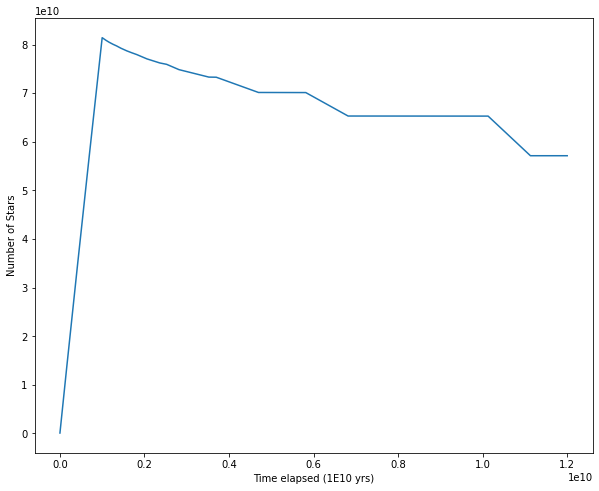

In [5]:
# Plotting the number of stars over time
plt.figure(figsize = (10,8))
plt.plot(T, Stnum, 'b')
plt.xlabel('Time elapsed (1E10 yrs)')
plt.ylabel('Number of Stars')
print(np.max(Stnum))

70974400036.27557


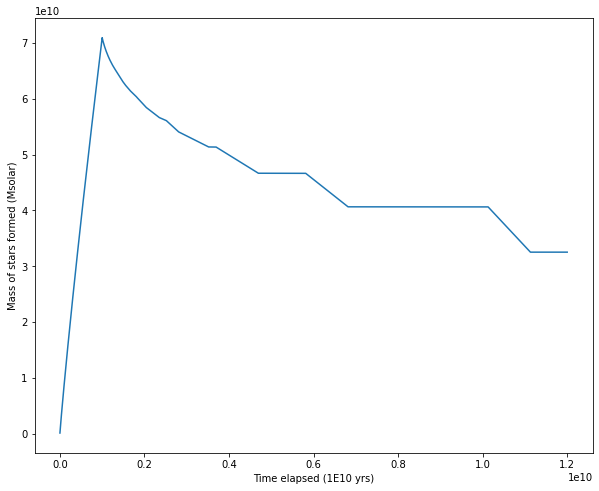

In [6]:
# Plotting the mass evolution over time
plt.figure(figsize = (10,8))
plt.plot(T, MassT, 'b')
plt.xlabel('Time elapsed (1E10 yrs)')
plt.ylabel('Mass of stars formed (Msolar)')
print(np.max(MassT))

In [7]:
# Finding how the luminosity of the stars evolves over time

# Arrays of zeroes to fill with luminosity of the stars
Lumb = np.zeros((Tl, Ml))
LumT = np.zeros(Tl)

# Nested for loops to find how the luminosity changes with mass intervals ovet the elapsed time
# i = Time
# j = Mass
for i in range(Tl):
  for j in range(Ml):
    # Luminosity equation changes power law with mass interval, a = 3.9 up to solar mass of 1, a = 5 thereafter
    if (M[j] >= 1):
      a = 3.9
    else:
      a = 5
    # Number of stars of each mass interval over the elapsed time, called from previous multiplied by the luminosity at the mass and time interval
    Lumb[i][j] = Numb[i][j] * Lumin(M[j],a)
  # Calling luminosity to the luminosity through time zeroes array
  LumT[i] = np.sum(Lumb[i])

987436760594.9504


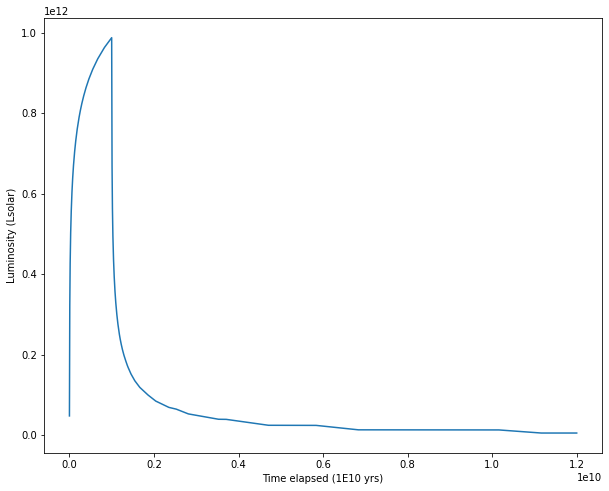

In [8]:
# Plotting the luminosity evolution over time
plt.figure(figsize = (10,8))
plt.plot(T, LumT, 'b')
plt.xlabel('Time elapsed (1E10 yrs)')
plt.ylabel('Luminosity (Lsolar)')
print(np.max(LumT))

8.434922553440567 0.2792188760096659 -17.87669803804364


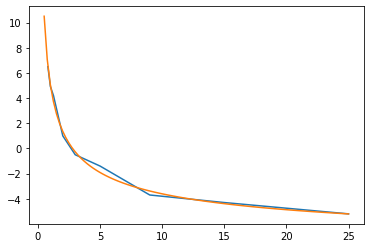

In [9]:
# V magnitude and colour graphs

# Curve fit this to find the colour
def Vmagfit(x, *p):
  return p[0] * np.exp(x**-p[1]) + p[2]

Vmag_guess = np.array([8.435,0.279,-17.877])
Vmagopt, Vmagcov = curve_fit(Vmagfit, MagMass, Vmag, Vmag_guess)

# Plotting Curve-fitted mass against V magnitude graph

plt.plot(MagMass, Vmag)
plt.plot(M, Vmagfit(M, *Vmagopt))

print(Vmagopt[0], Vmagopt[1], Vmagopt[2])

8.779886753933368 0.3194205332347948 -18.08697491649469


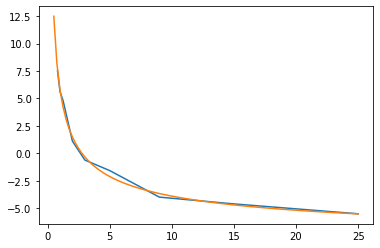

In [10]:
Bmag = BVmag + Vmag

def Bmagfit(x, *p):
  return p[0] * np.exp(x**-p[1]) + p[2]

Bmag_guess = np.array([8.77,0.319,-18.087])
Bmagopt, Bmagcov = curve_fit(Bmagfit, MagMass, Bmag, Bmag_guess)

plt.plot(MagMass, Bmag)
plt.plot(M, Bmagfit(M, *Bmagopt))

print(Bmagopt[0], Bmagopt[1], Bmagopt[2])

In [ ]:
# Relationship between magnitude and flux is given by:
# VmagGal = MagAV + 2.5*np.log(Fav/Fgal)
# Fgal and Fav are related via Fgal = Fav * M
# MagAV - absolute V magnitude, Fav - absolute V flux, Fgal - Galactic flux

In [13]:

LumB = np.zeros((Tl,Ml))
TimeB = np.zeros(Tl)

# Using a for loop to calculate how the flux per star changes with mass and changes through time
for i in range(Tl):
  for j in range(Ml):
    LumB[i] = Lumin[i] * 10**(0.4 * (Vmagfit(M, *Vmagopt) - Bmagfit(M, *Bmagopt)))

print(len(LumB))


TypeError: ignored